# Exponential Family and Generalized Linear Models (GLMs)

Understanding the **Exponential Family** is key to unifying many probabilistic models under a common framework from linear and logistic regression to Poisson regression and beyond. In this notebook, we’ll explore how GLMs naturally emerge from this foundation.


## 1. Exponential Family: Canonical Form

Any distribution in the exponential family can be written as:

$$
p(y; \eta) = b(y) \exp\left( \eta^T T(y) - a(\eta) \right)
$$

- $ \eta $: natural (canonical) parameter  
- $ T(y) $: sufficient statistics  
- $ a(\eta) $: log partition function (normalization)  
- $ b(y) $: base measure  


## 2. Examples of Exponential Family Distributions

### • Bernoulli Distribution

$$
p(y; \phi) = \phi^y (1 - \phi)^{1 - y}
$$

Rewriting in canonical form:

- $ \eta = \log\left( \frac{\phi}{1 - \phi} \right) $
- $ T(y) = y $
- $ a(\eta) = \log(1 + e^\eta) $
- $ b(y) = 1 $

This forms the basis of **Logistic Regression**.

### • Gaussian Distribution

$$
p(y; \mu) = \frac{1}{\sqrt{2\pi}} \exp\left( -\frac{(y - \mu)^2}{2} \right)
$$

Canonical form:

- $ \eta = \mu $
- $ T(y) = y $
- $ a(\eta) = \frac{\eta^2}{2} $
- $ b(y) = \frac{1}{\sqrt{2\pi}} \exp\left( -\frac{y^2}{2} \right) $

This leads to **Linear Regression**.

## 3. What is a Generalized Linear Model?

A GLM is defined by:

1. **A distribution from the Exponential Family**
2. **A linear predictor**:  
   $$ z = \theta^T x $$
3. **A link function**:  
   $$ \eta = g(\mu) $$  
   where $ \mu = \mathbb{E}[y|x] $


###  Common GLMs

| Model                | Distribution | Link Function     |
|---------------------|--------------|-------------------|
| Linear Regression    | Gaussian     | Identity          |
| Logistic Regression  | Bernoulli    | Logit             |
| Poisson Regression   | Poisson      | Log (canonical)   |

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_likelihood_bernoulli(X, y, theta):
    z = X @ theta
    h = sigmoid(z)
    epsilon = 1e-15
    return np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

In [3]:
def train_glm_logistic(X, y, lr=0.1, epochs=1000):
    X = np.c_[np.ones(X.shape[0]), X] 
    theta = np.zeros(X.shape[1])
    losses = []

    for i in range(epochs):
        z = X @ theta
        h = sigmoid(z)
        gradient = X.T @ (h - y) / y.size
        theta -= lr * gradient

        if i % 50 == 0:
            loss = -log_likelihood_bernoulli(X, y, theta)
            losses.append(loss)

    return theta, losses


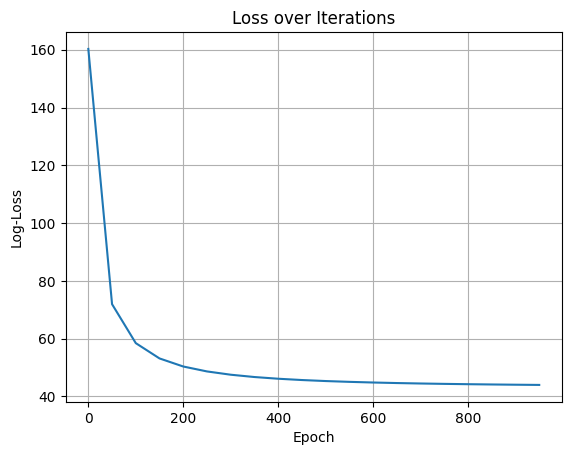

In [4]:
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

theta, losses = train_glm_logistic(X_train, y_train)

plt.plot(np.arange(len(losses)) * 50, losses)
plt.title("Loss over Iterations")
plt.xlabel("Epoch")
plt.ylabel("Log-Loss")
plt.grid(True)
plt.show()


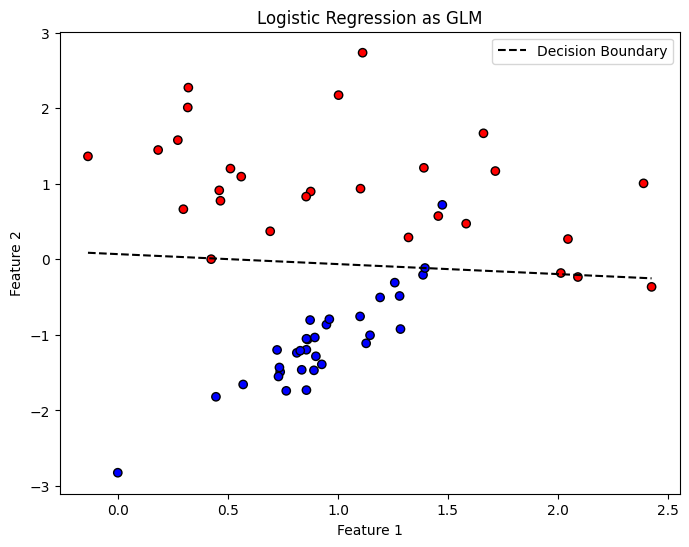

In [5]:
def plot_decision_boundary(X, y, theta):
    X = np.c_[np.ones(X.shape[0]), X]  # for consistency
    plt.figure(figsize=(8,6))
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr', edgecolors='k')
    
    x1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    x2 = -(theta[0] + theta[1]*x1) / theta[2]
    plt.plot(x1, x2, 'k--', label='Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression as GLM')
    plt.legend()
    plt.show()

plot_decision_boundary(X_test, y_test, theta)
